<a href="https://colab.research.google.com/github/danielelbrecht/CAP5610-HW-2/blob/master/CAP5610_HW2_model4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model # 4: Base model plus data augmentation (shift, rotate, zoom)

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import cifar10
import numpy as np
import sklearn
import tensorflow as tf
from tensorflow.keras import layers, utils

Using TensorFlow backend.


In [0]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [0]:
# Preprocess data
train_images = train_images.reshape((50000, 32, 32, 3)) / 255.0
test_images = test_images.reshape((10000, 32, 32, 3)) / 255.0

train_labels_categorical = utils.to_categorical(train_labels, num_classes=10, dtype='float32')
test_labels_categorical = utils.to_categorical(test_labels, num_classes=10, dtype='float32')

# Implement simple holdout validation
length = len(train_images)
threshold = int(length * 0.8)

train_set_images = train_images[0:threshold]
train_set_labels = train_labels_categorical[0:threshold]

val_set_images = train_images[threshold:length]
val_set_labels = train_labels_categorical[threshold:length]

In [7]:
#Define model

model = tf.keras.Sequential()

# First convolutional module
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))

# Second convolutional module
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))


# Fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
__________

In [0]:
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow(
    x=train_set_images,
    y=train_set_labels,
    batch_size=50,
)

validation_datagen = ImageDataGenerator()

validation_generator = validation_datagen.flow(
    x=val_set_images,
    y=val_set_labels,
    batch_size=50,
)

In [9]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=800,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=200
)

Epoch 1/20
800/800 [==============================] - 166s 207ms/step - loss: 1.8906 - acc: 0.3047 - val_loss: 1.5726 - val_acc: 0.4370
Epoch 2/20
800/800 [==============================] - 166s 207ms/step - loss: 1.6555 - acc: 0.4003 - val_loss: 1.4072 - val_acc: 0.4952
Epoch 3/20
800/800 [==============================] - 165s 206ms/step - loss: 1.5620 - acc: 0.4405 - val_loss: 1.5278 - val_acc: 0.4624
Epoch 4/20
800/800 [==============================] - 165s 207ms/step - loss: 1.5027 - acc: 0.4595 - val_loss: 1.2549 - val_acc: 0.5492
Epoch 5/20
800/800 [==============================] - 165s 207ms/step - loss: 1.4450 - acc: 0.4830 - val_loss: 1.2486 - val_acc: 0.5595
Epoch 6/20
800/800 [==============================] - 163s 204ms/step - loss: 1.4080 - acc: 0.4977 - val_loss: 1.1253 - val_acc: 0.6043
Epoch 7/20
800/800 [==============================] - 164s 205ms/step - loss: 1.3885 - acc: 0.5051 - val_loss: 1.1328 - val_acc: 0.6033
Epoch 8/20
800/800 [============================

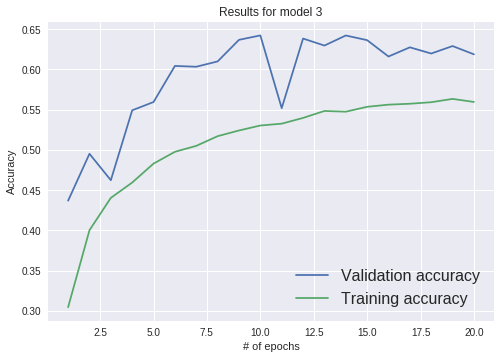

In [12]:
#plot results
import matplotlib as mpl
import matplotlib.pyplot as plt

epoch = []
for i in range(20):
  epoch.append(i+1)
  
plt.plot(epoch, history.history['val_acc'], label='Validation accuracy')
plt.plot(epoch, history.history['acc'], label='Training accuracy')
plt.xlabel("# of epochs")
plt.ylabel("Accuracy")
plt.title("Results for model 3")
plt.legend(loc="lower right", fontsize=16)
plt.show()